In [ ]:
#!pip install bertopic

In [ ]:
from bertopic import BERTopic
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/exp_1990_2022_10800.csv")
# Drop rows with 'Year' in the "Year" column
df = df.drop(df[df['Year'] == 'Year'].index)
# Convert "Year" column to a valid date-time format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_text = df[['Titles', 'Abstract']]
df_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10851
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Titles    10799 non-null  object
 1   Abstract  10799 non-null  object
dtypes: object(2)
memory usage: 253.1+ KB


In [ ]:
# Combine 'Titles' and 'Abstract' columns and convert to string
df_text['new'] = df_text['Titles'].astype(str) + " " + df_text['Abstract'].astype(str)
# Convert 'new' column to list of strings
docs = df_text['new'].tolist()

In [ ]:
#unigram
topic_model = BERTopic(calculate_probabilities=True,verbose=True,)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/338 [00:00<?, ?it/s]

2023-04-23 14:39:18,683 - BERTopic - Transformed documents to Embeddings
2023-04-23 14:39:59,366 - BERTopic - Reduced dimensionality
2023-04-23 14:40:13,020 - BERTopic - Clustered reduced embeddings


In [ ]:
import pickle
# Save fitted model and data in a pickle file
with open('topic_model.pkl', 'wb') as f:
    pickle.dump((topic_model, docs), f)

In [ ]:
df_model=topic_model.get_document_info(docs)
df_model

,Document,Topic,Name,Top_n_words,Probability,Representative_document
0,Energy Efficient Layered Cluster Head Rotation...,3,3_cluster_clustering_energy_head,cluster - clustering - energy - head - nodes -...,0.049515,False
1,Underwater object detection using collaborativ...,2,2_object_learning_deep_neural,object - learning - deep - neural - convolutio...,0.557150,False
2,Characteristics of Miniaturized Monolithic PMN...,22,22_transducer_piezoelectric_cmut_hydrophone,transducer - piezoelectric - cmut - hydrophone...,0.443030,False
3,Methodology for Phytoplankton Taxonomic Group ...,-1,-1_the_of_and_to,the - of - and - to - in - is - for - underwat...,0.400061,False
4,Physics-informed neural network for polarimetr...,-1,-1_the_of_and_to,the - of - and - to - in - is - for - underwat...,0.246494,False
...,...,...,...,...,...,...
10794,Adaptive Multiuser Detection for Underwater Ac...,0,0_mac_protocol_access_throughput,mac - protocol - access - throughput - delay -...,0.113813,False
10795,Application of a cooperative control system to...,-1,-1_the_of_and_to,the - of - and - to - in - is - for - underwat...,0.302293,False
10796,Shape and range recovery from images of underw...,-1,-1_the_of_and_to,the - of - and - to - in - is - for - underwat...,0.732780,False
10797,Significance of envelope detection in underwat...,-1,-1_the_of_and_to,the - of - and - to - in - is - for - underwat...,0.321412,False


In [ ]:
#Dynamic Topic Modeling
timestamps=df.Year
topics_over_time = topic_model.topics_over_time(docs, timestamps)
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

33it [00:17,  1.86it/s]


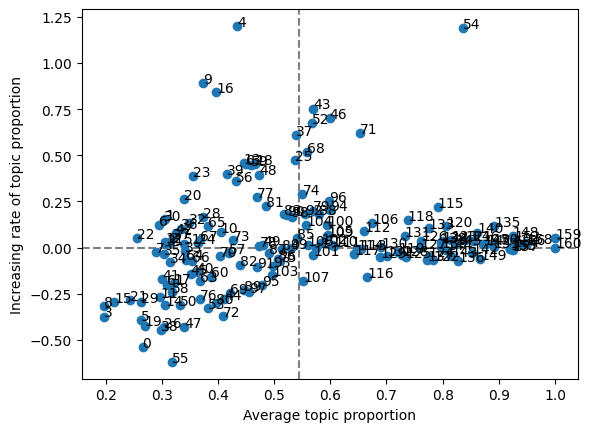

In [ ]:

avg_topic_proportions = df_model.groupby('Topic')['Probability'].mean().reset_index()

# Calculate the increasing rate of the topic proportion
increasing_rate = []
for i in range(1, len(avg_topic_proportions)):
    prev = avg_topic_proportions.iloc[i-1]['Probability']
    curr = avg_topic_proportions.iloc[i]['Probability']
    rate = (curr - prev) / prev 
    increasing_rate.append(rate)
increasing_rate.insert(0, 0) # Insert 0 as the first value
avg_topic_proportions['increasing_rate'] = increasing_rate

# Calculate the mean topic proportion and plot a dotted line on the x-axis
mean_topic_prop = avg_topic_proportions['Probability'].mean()
plt.axvline(x=mean_topic_prop, color='gray', linestyle='--')

# Plot a dotted line on the y-axis at 0
plt.axhline(y=0, color='gray', linestyle='--')

# Plot the results
import matplotlib.pyplot as plt
plt.plot(avg_topic_proportions['Probability'], avg_topic_proportions['increasing_rate'], marker='o', linestyle='none')
plt.xlabel('Average topic proportion')
plt.ylabel('Increasing rate of topic proportion')
for i, txt in enumerate(avg_topic_proportions['Topic']):
    plt.annotate(txt, (avg_topic_proportions['Probability'][i], avg_topic_proportions['increasing_rate'][i]))
plt.show()



In [ ]:
# remove outlier (topic -1) 
df_model = df_model.drop(df_model[df_model['Topic'] == -1].index)

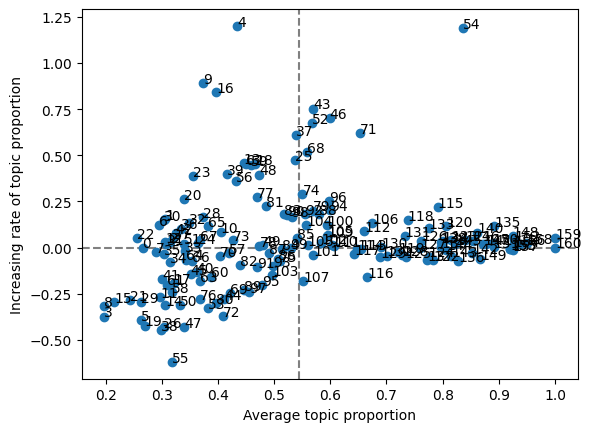

In [ ]:

avg_topic_proportions = df_model.groupby('Topic')['Probability'].mean().reset_index()

# Calculate the increasing rate of the topic proportion
increasing_rate = []
for i in range(1, len(avg_topic_proportions)):
    prev = avg_topic_proportions.iloc[i-1]['Probability']
    curr = avg_topic_proportions.iloc[i]['Probability']
    rate = (curr - prev) / prev 
    increasing_rate.append(rate)
increasing_rate.insert(0, 0) # Insert 0 as the first value
avg_topic_proportions['increasing_rate'] = increasing_rate

# Calculate the mean topic proportion and plot a dotted line on the x-axis
mean_topic_prop = avg_topic_proportions['Probability'].mean()
plt.axvline(x=mean_topic_prop, color='gray', linestyle='--')

# Plot a dotted line on the y-axis at 0
plt.axhline(y=0, color='gray', linestyle='--')

# Plot the results
import matplotlib.pyplot as plt
plt.plot(avg_topic_proportions['Probability'], avg_topic_proportions['increasing_rate'], marker='o', linestyle='none')
plt.xlabel('Average topic proportion')
plt.ylabel('Increasing rate of topic proportion')
for i, txt in enumerate(avg_topic_proportions['Topic']):
    plt.annotate(txt, (avg_topic_proportions['Probability'][i], avg_topic_proportions['increasing_rate'][i]))
plt.show()



In [ ]:
avg_topic_proportions['Probability'].mean()

0.544163764577884